Attempting other algorithms for 

In [29]:
import pandas as pd
import numpy as np 
import sklearn
import seaborn as sn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
import scikitplot as skplt
#import plotly.express as px #not working

SMOTE for python https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [3]:
jeager_lacar_counts_path = '/home/acampbell/PavLabEngrams/EngramCellClassifier/jeager_lacar_combinedcounts.csv'
combined_meta_path = '/home/acampbell/PavLabEngrams/EngramCellClassifier/jeager_lacar_combinedmeta.csv'

In [25]:
combinedcounts = pd.read_csv(jeager_lacar_counts_path)
combinedcounts.rename(columns  = {'Unnamed: 0':'gene'},inplace = True)
combinedcounts = combinedcounts.set_index('gene')
combinedmeta = pd.read_csv(combined_meta_path)
combinedmeta = combinedmeta.iloc[:,2:]
combinedmeta = combinedmeta.set_index('CellID')

In [26]:
combinedcounts.head(5)

,X151207_G3_N_C_N_HC_3,X151214_A11_P_C_F_EE_3,X151214_A2_P_C_N_EE_3,X151214_A3_P_C_N_EE_3,X151214_A9_P_C_F_EE_3,X151214_B10_P_C_F_EE_3,X151214_B11_P_C_F_EE_3,X151214_B12_P_C_F_EE_3,X151214_B2_P_C_N_EE_3,X151214_B3_P_C_N_EE_3,...,nm_ux_tn_E3_141204,nm_ux_tn_E4_141204,nm_ux_tn_E5_141204,nm_ux_tn_E6_141204,nm_ux_tn_F1_141204,nm_ux_tn_F2_141204,nm_ux_tn_F3_141204,nm_ux_tn_F4_141204,nm_ux_tn_F5_141204,nm_ux_tn_F6_141204
gene,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,2,0,0,0,0,59,0,0,0,0,...,0.00,0.00,0.0,0.00,4.03,2.49,0.00,11.34,0.0,1.91
0610007P14Rik,83,0,6,488,13,250,31,0,1,4,...,2.86,2.12,0.0,2.65,126.02,2.42,10.96,7.45,0.0,79.05
0610009B22Rik,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00
0610009E02Rik,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,50.16,0.00,0.00,0.00,0.00,0.0,0.00
0610009L18Rik,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00


In [28]:
combinedmeta.head(5)

,treatment,facs_sort,fos_status,ActivityStatus,ArcStatus,FosStatus,Activity_class
CellID,,,,,,,
X151207_G3_N_C_N_HC_3,HC,Fos-,Fos-,Inactive,NaN,NaN,Inactive
X151214_A11_P_C_F_EE_3,1hr,Fos+,Fos+,Active,NaN,NaN,EarlySignature
X151214_A2_P_C_N_EE_3,1hr,Fos-,Fos-,Inactive,NaN,NaN,Inactive
X151214_A3_P_C_N_EE_3,1hr,Fos-,Fos-,Inactive,NaN,NaN,Inactive
X151214_A9_P_C_F_EE_3,1hr,Fos+,Fos+,Active,NaN,NaN,EarlySignature


In [32]:
combinedcounts_lognorm = combinedcounts.T
combinedcounts_lognorm  = np.log(combinedcounts_lognorm  + 1)
combinedcounts_lognorm.head(5)

gene,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610012D04Rik,...,Zwilch,Zwint,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3
X151207_G3_N_C_N_HC_3,1.098612,4.430817,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.332205,0.0,...,5.262690,0.000000,0.0,2.484907,0.000000,0.0,1.609438,0.0,4.852030,5.056246
X151214_A11_P_C_F_EE_3,0.000000,0.000000,0.0,0.0,0.0,0.000000,2.079442,0.000000,0.000000,0.0,...,0.000000,4.595120,0.0,0.000000,0.000000,0.0,0.000000,0.0,3.891820,0.000000
X151214_A2_P_C_N_EE_3,0.000000,1.945910,0.0,0.0,0.0,0.693147,0.000000,4.941642,0.693147,0.0,...,0.000000,6.030685,0.0,0.000000,0.000000,0.0,5.105945,0.0,2.708050,0.693147
X151214_A3_P_C_N_EE_3,0.000000,6.192362,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.693147,0.000000,0.0,0.000000,5.814131,0.0,1.386294,0.0,4.997212,0.000000
X151214_A9_P_C_F_EE_3,0.000000,2.639057,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.693147,0.000000,0.0,0.000000,0.000000,0.0,1.609438,0.0,0.000000,3.258097


In [33]:
from sklearn.preprocessing import StandardScaler
genes = combinedcounts_lognorm.columns
cells = combinedcounts_lognorm.index
combinedcounts_lognorm = StandardScaler().fit_transform(combinedcounts_lognorm.values)
combinedcounts_lognorm = pd.DataFrame(combinedcounts_lognorm,
                                   columns = genes,
                                  index = cells)
combinedcounts_lognorm.head(5)

gene,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610012D04Rik,...,Zwilch,Zwint,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3
X151207_G3_N_C_N_HC_3,0.382241,0.935545,-0.281299,-0.324735,-0.181433,-0.406953,-0.480725,-0.417553,1.185076,0.0,...,7.867831,-1.461987,-0.172996,3.299793,-0.392438,0.0,-0.121540,-0.391174,1.068008,1.982090
X151214_A11_P_C_F_EE_3,-0.908280,-1.167603,-0.281299,-0.324735,-0.181433,-0.406953,0.687300,-0.417553,-0.592364,0.0,...,-0.369619,0.072202,-0.172996,-0.153892,-0.392438,0.0,-0.905896,-0.391174,0.642019,-0.547628
X151214_A2_P_C_N_EE_3,-0.908280,-0.243950,-0.281299,-0.324735,-0.181433,0.013160,-0.480725,2.626462,-0.222631,0.0,...,-0.369619,0.551500,-0.172996,-0.153892,-0.392438,0.0,1.582476,-0.391174,0.116848,-0.200836
X151214_A3_P_C_N_EE_3,-0.908280,1.771687,-0.281299,-0.324735,-0.181433,-0.406953,-0.480725,-0.417553,-0.592364,0.0,...,0.715333,-1.461987,-0.172996,-0.153892,3.319431,0.0,-0.230288,-0.391174,1.132417,-0.547628
X151214_A9_P_C_F_EE_3,-0.908280,0.085062,-0.281299,-0.324735,-0.181433,-0.406953,-0.480725,-0.417553,-0.592364,0.0,...,0.715333,-1.461987,-0.172996,-0.153892,-0.392438,0.0,-0.121540,-0.391174,-1.084557,1.082448


In [36]:
combinedmeta.columns

Index(['treatment', 'facs_sort', 'fos_status', 'ActivityStatus', 'ArcStatus',
       'FosStatus', 'Activity_class'],
      dtype='object')

In [38]:
Activitystatus = combinedmeta.ActivityStatus == 'Active'

In [39]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [40]:
Activitystatus.value_counts()

True     576
False    174
Name: ActivityStatus, dtype: int64

In [42]:
# https://www.projectpro.io/recipes/perform-logistic-regression-sklearn
# https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
logreg = LogisticRegression(max_iter=100000)

# evaluate model
scores = cross_val_score(logreg, combinedcounts_lognorm, Activitystatus, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.936 (0.028)


In [45]:
from sklearn.model_selection import train_test_split 
combinedcounts_lognorm_train, combinedcounts_lognorm_test, Activitystatus_train, Activitystatus_test = train_test_split(combinedcounts_lognorm, Activitystatus,
                                                                                               test_size=0.25,random_state=1)

# data withheld _dwh
logregCV10_jeager_model_dwh = LogisticRegressionCV(cv=10, random_state=0, max_iter=100000).fit(combinedcounts_lognorm_train.to_numpy(), 
                                                                             Activitystatus_train.to_numpy())

In [48]:
logregCV10_jeager_model_dwh.predict(combinedcounts_lognorm_test.to_numpy())

logregCV10_jeager_model_dwh.predict_proba(combinedcounts_lognorm_test.to_numpy()).shape

print(logregCV10_jeager_model_dwh.score(combinedcounts_lognorm_test.to_numpy(), Activitystatus_test.to_numpy()))

0.9521276595744681


In [49]:
# https://plotly.com/python/roc-and-pr-curves/
y_score_dwh = logregCV10_jeager_model_dwh.predict_proba(combinedcounts_lognorm_test.to_numpy())[:, 1]

# https://www.projectpro.io/recipes/plot-roc-curve-in-python
false_positive_rate_dwh, true_positive_rate_dwh, threshold_dwh = roc_curve(Activitystatus_test.to_numpy(), y_score_dwh)

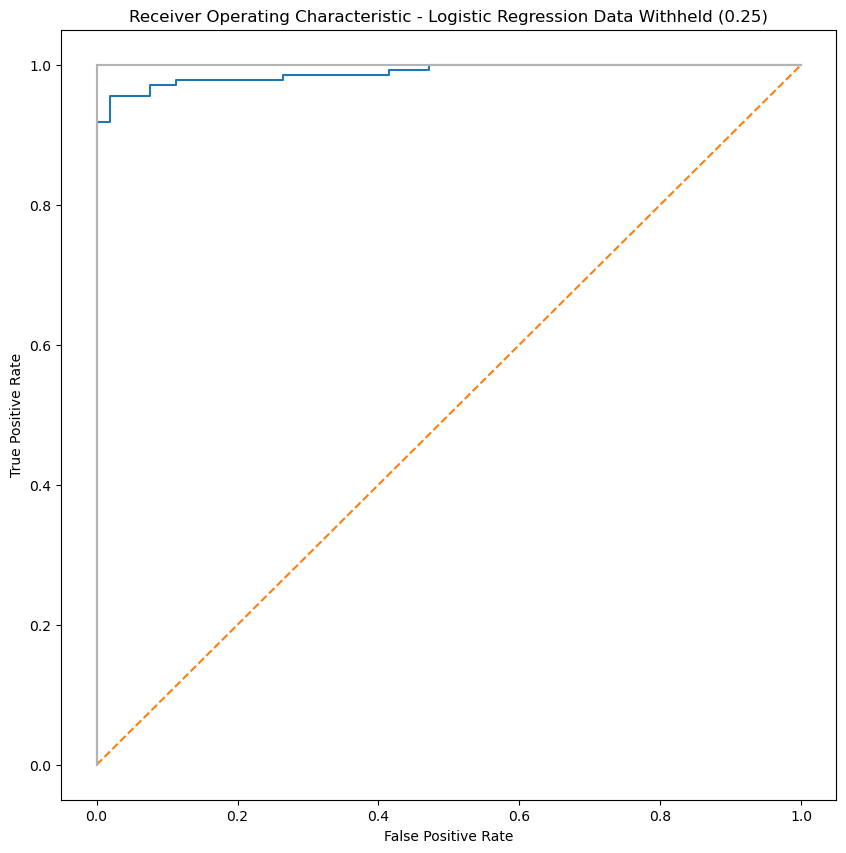

In [50]:
# Making the roc
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression Data Withheld (0.25)')
plt.plot(false_positive_rate_dwh, true_positive_rate_dwh)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
# getting important genes out
#logreg_features_coefficients = pd.DataFrame([glut_lognorm_test.columns,logreg_glut.coef_ ], columns = ['gene', 'coefficient'])
logreg_features_coefficients =  pd.DataFrame({'coefficient':np.reshape(logreg_glut.coef_, newshape = (23354) )}, index = glut_lognorm_test.columns)
logreg_features_coefficients.reset_index(inplace=True)
logreg_features_coefficients = logreg_features_coefficients.rename(columns = {'index':'gene'})

Accuracy: 0.891 (0.026)
